In [35]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import warnings


#WARNINGS
warnings.filterwarnings("ignore", message="Non-invertible starting MA parameters found. Using zeros as starting parameters.")
# Load dataset
merged_df = pd.read_csv('updated_dataset_with_predictions.csv')

# Drop rows with missing values
merged_df.dropna(inplace=True)

station_name = 'Stn XV (San Pedro)'
merged_df = merged_df[merged_df['Monitoring Stations'] == station_name]

# Ensure there's a Date column for time series forecasting
# Assuming 'Year' and 'Month' columns exist
merged_df['Date'] = pd.to_datetime(merged_df[['Year', 'Month']].assign(DAY=1))
merged_df.set_index('Date', inplace=True)

merged_df = merged_df.asfreq('ME')

# Define SARIMA parameters
sarima_order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  # Monthly data with yearly seasonality

# Initialize dictionaries for models and forecasts
models = {}
forecasts = {}

# List of parameters to model
parameters = ['pH (units)', 'Ammonia (mg/L)', 'Nitrate (mg/L)', 'Inorganic Phosphate (mg/L)', 'BOD (mg/l)', 'Dissolved Oxygen (mg/l)', 'Total coliforms (MPN/100ml)']

# Fit SARIMA model and make forecasts
for parameter in parameters:
    try:
        # Check if the parameter exists in the filtered data
        if parameter in merged_df.columns:
            model = SARIMAX(station_data[parameter], order=sarima_order, seasonal_order=seasonal_order)
            model_fit = model.fit(disp=False)
            forecast = model_fit.get_forecast(steps=1)  # Forecast one step ahead
            forecasts[parameter] = forecast.predicted_mean.iloc[0]  # Extract the scalar forecast value
        else:
            print(f"Parameter '{parameter}' not found in the data for station '{station_name}'.")
    except Exception as e:
        print(f"An error occurred while fitting the model for {parameter}: {e}")

# Create a DataFrame to store the forecast results with parameters as columns
forecast_df = pd.DataFrame([forecasts])

# Add a column for the forecast date
forecast_date = station_data.index[-1] + pd.DateOffset(months=1)
forecast_df['Forecast Date'] = forecast_date

# Print the DataFrame
print(forecast_df)




An error occurred while fitting the model for pH (units): name 'station_data' is not defined
An error occurred while fitting the model for Ammonia (mg/L): name 'station_data' is not defined
An error occurred while fitting the model for Nitrate (mg/L): name 'station_data' is not defined
An error occurred while fitting the model for Inorganic Phosphate (mg/L): name 'station_data' is not defined
An error occurred while fitting the model for BOD (mg/l): name 'station_data' is not defined
An error occurred while fitting the model for Dissolved Oxygen (mg/l): name 'station_data' is not defined
An error occurred while fitting the model for Total coliforms (MPN/100ml): name 'station_data' is not defined


NameError: name 'station_data' is not defined

In [44]:
import pandas as pd
import pickle

# Sample input data (replace with realistic values)
sample_data = pd.DataFrame({
    'Temperature': [30.75],  # Example temperature
    'Humidity': [79],     # Example humidity
    'Wind': [6],            # Example wind direction (mapped value)
    'Wind Speed': [19],   # Example wind speed
    'Ammonia (mg/L)': [0.100], # Example ammonia level
    'Inorganic Phosphate (mg/L)': [0.100], # Example phosphate level
    'BOD (mg/l)': [2],    # Example BOD level
   
})

# Load the scaler
with open('xgb_scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

# Standardize the sample input using the same scaler
sample_data_scaled = scaler.transform(sample_data)

# Load the saved model
with open('xgb_model.pkl', 'rb') as file:
    loaded_svr_model = pickle.load(file)

# Predict using the loaded model
sample_prediction = loaded_svr_model.predict(sample_data_scaled)

# Print the prediction
print(f'Sample Prediction: {sample_prediction[0]}')


Sample Prediction: 18041.9921875


   pH (units)  Ammonia (mg/L)  Nitrate (mg/L)  Inorganic Phosphate (mg/L)  \
0         0.0             0.0             0.0                         0.0   

   BOD (mg/l)  Dissolved Oxygen (mg/l)  Total coliforms (MPN/100ml)  \
0         0.0                      0.0                          0.0   

  Forecast Date  
0    2022-12-30  


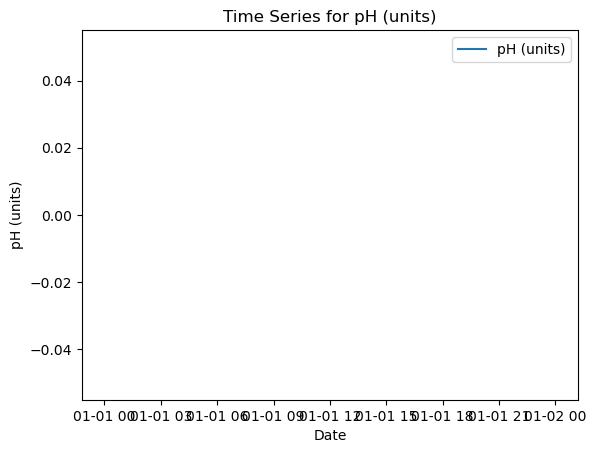

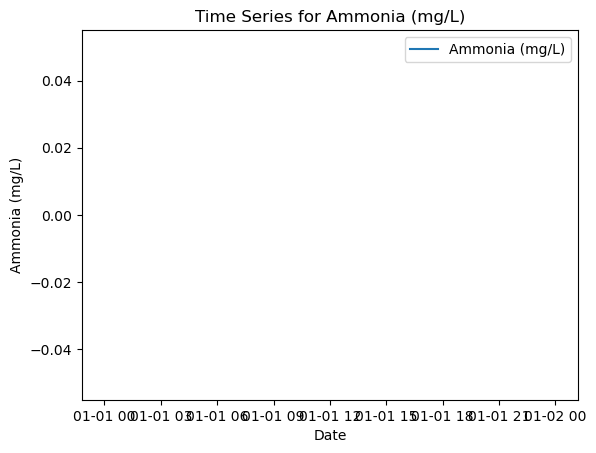

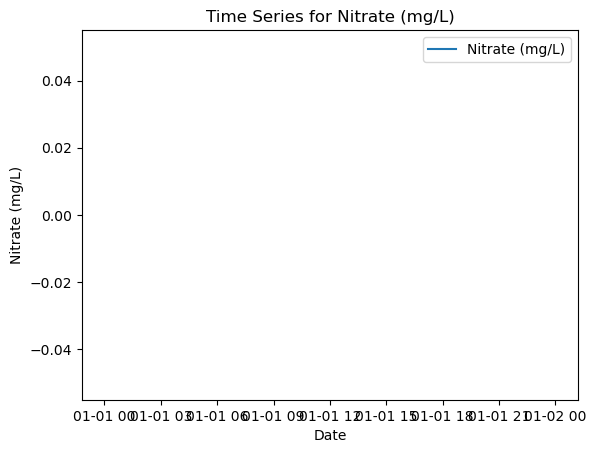

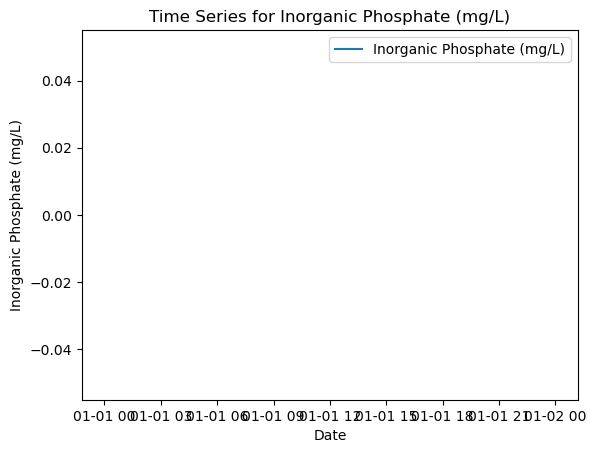

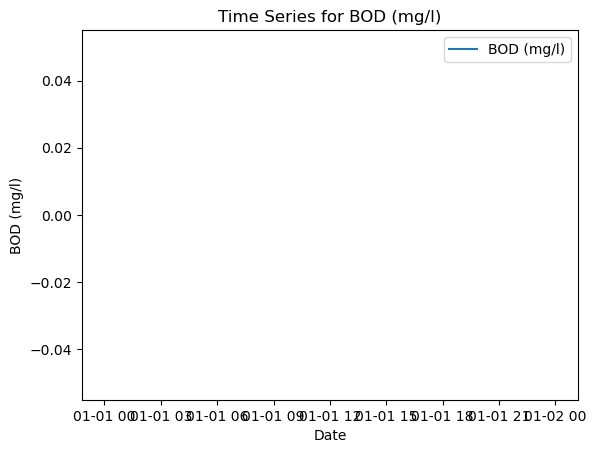

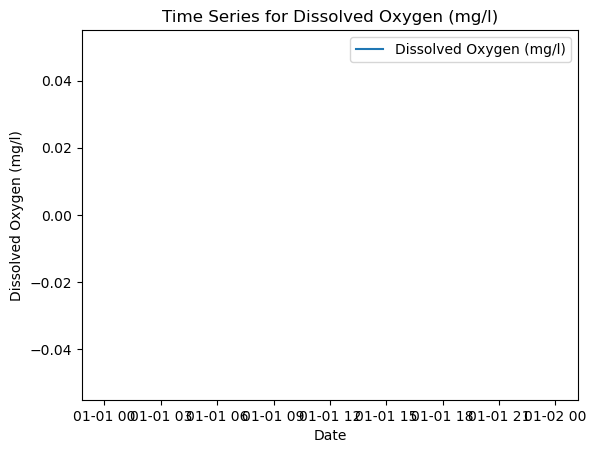

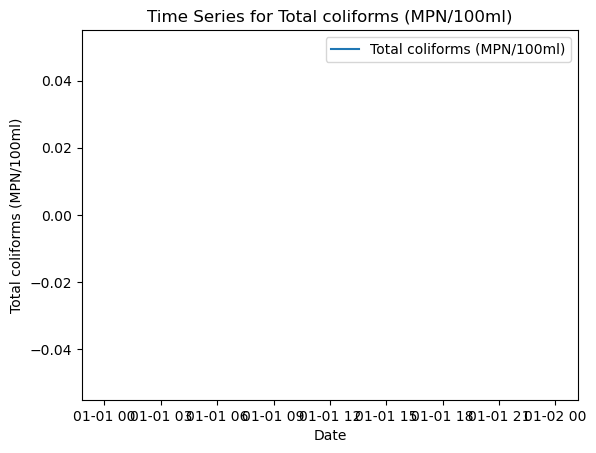

In [124]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import warnings

# WARNINGS
warnings.filterwarnings("ignore", message="Too few observations to estimate starting parameters")

# Load dataset
merged_df = pd.read_csv('New_Merged.csv')

# Drop rows with missing values
merged_df.dropna(inplace=True)

# Filter data for the specific monitoring station
station_name = 'Stn XV (San Pedro)'
merged_df = merged_df[merged_df['Monitoring Stations'] == station_name]

# Ensure there's a Date column for time series forecasting
merged_df['Date'] = pd.to_datetime(merged_df[['Year', 'Month']].assign(DAY=1))
merged_df.set_index('Date', inplace=True)

# Set frequency to end of month
merged_df = merged_df.asfreq('ME')

# Define ARIMA parameters
arima_order = (0, 1, 1)  # Simplified ARIMA model

# Initialize dictionaries for models and forecasts
models = {}
forecasts = {}

# List of parameters to model
parameters = ['pH (units)', 'Ammonia (mg/L)', 'Nitrate (mg/L)', 'Inorganic Phosphate (mg/L)', 'BOD (mg/l)', 'Dissolved Oxygen (mg/l)', 'Total coliforms (MPN/100ml)']

# Fit ARIMA model and make forecasts
for parameter in parameters:
    try:
        # Check if the parameter exists in the filtered data
        if parameter in merged_df.columns:
            model = ARIMA(merged_df[parameter], order=arima_order)
            model_fit = model.fit()  # Fit without disp parameter
            forecast = model_fit.forecast(steps=1)  # Forecast one step ahead
            forecasts[parameter] = forecast.iloc[0]  # Extract the scalar forecast value
        else:
            print(f"Parameter '{parameter}' not found in the data for station '{station_name}'.")
    except Exception as e:
        print(f"An error occurred while fitting the model for {parameter}: {e}")

# Create a DataFrame to store the forecast results with parameters as columns
forecast_df = pd.DataFrame([forecasts])

# Add a column for the forecast date
forecast_date = merged_df.index[-1] + pd.DateOffset(months=1)
forecast_df['Forecast Date'] = forecast_date

# Print the DataFrame
print(forecast_df)

import matplotlib.pyplot as plt

# Plot each parameter to visualize trends
for parameter in parameters:
    plt.figure()
    plt.plot(merged_df.index, merged_df[parameter], label=parameter)
    plt.title(f'Time Series for {parameter}')
    plt.xlabel('Date')
    plt.ylabel(parameter)
    plt.legend()
    plt.show()

